<a href="https://colab.research.google.com/github/adrianbrios/My_data_science_projects/blob/main/Titanic_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITANIC DATASET - KAGGLE COMPETITION**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os
import urllib.request

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()

In [ ]:
def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [ ]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")


In [ ]:

train_data = train_data.set_index("PassengerId")   # hacemos el passengerId como indice
test_data = test_data.set_index("PassengerId")

In [ ]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
train_data.shape

(891, 11)

In [ ]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Hay 177 valores faltantes en la variable Age.\
Hay 687 valores faltantes en la variable Cabin \
Hay 2 valores faltantes en la variable Embarked

In [ ]:
#porcentaje de missing values
train_data.isnull().sum()/len(train_data)

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

In [ ]:
X_train = train_data.drop("Survived", axis=1)

X_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
y_train = train_data["Survived"]    #definimos el label

In [ ]:
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [ ]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

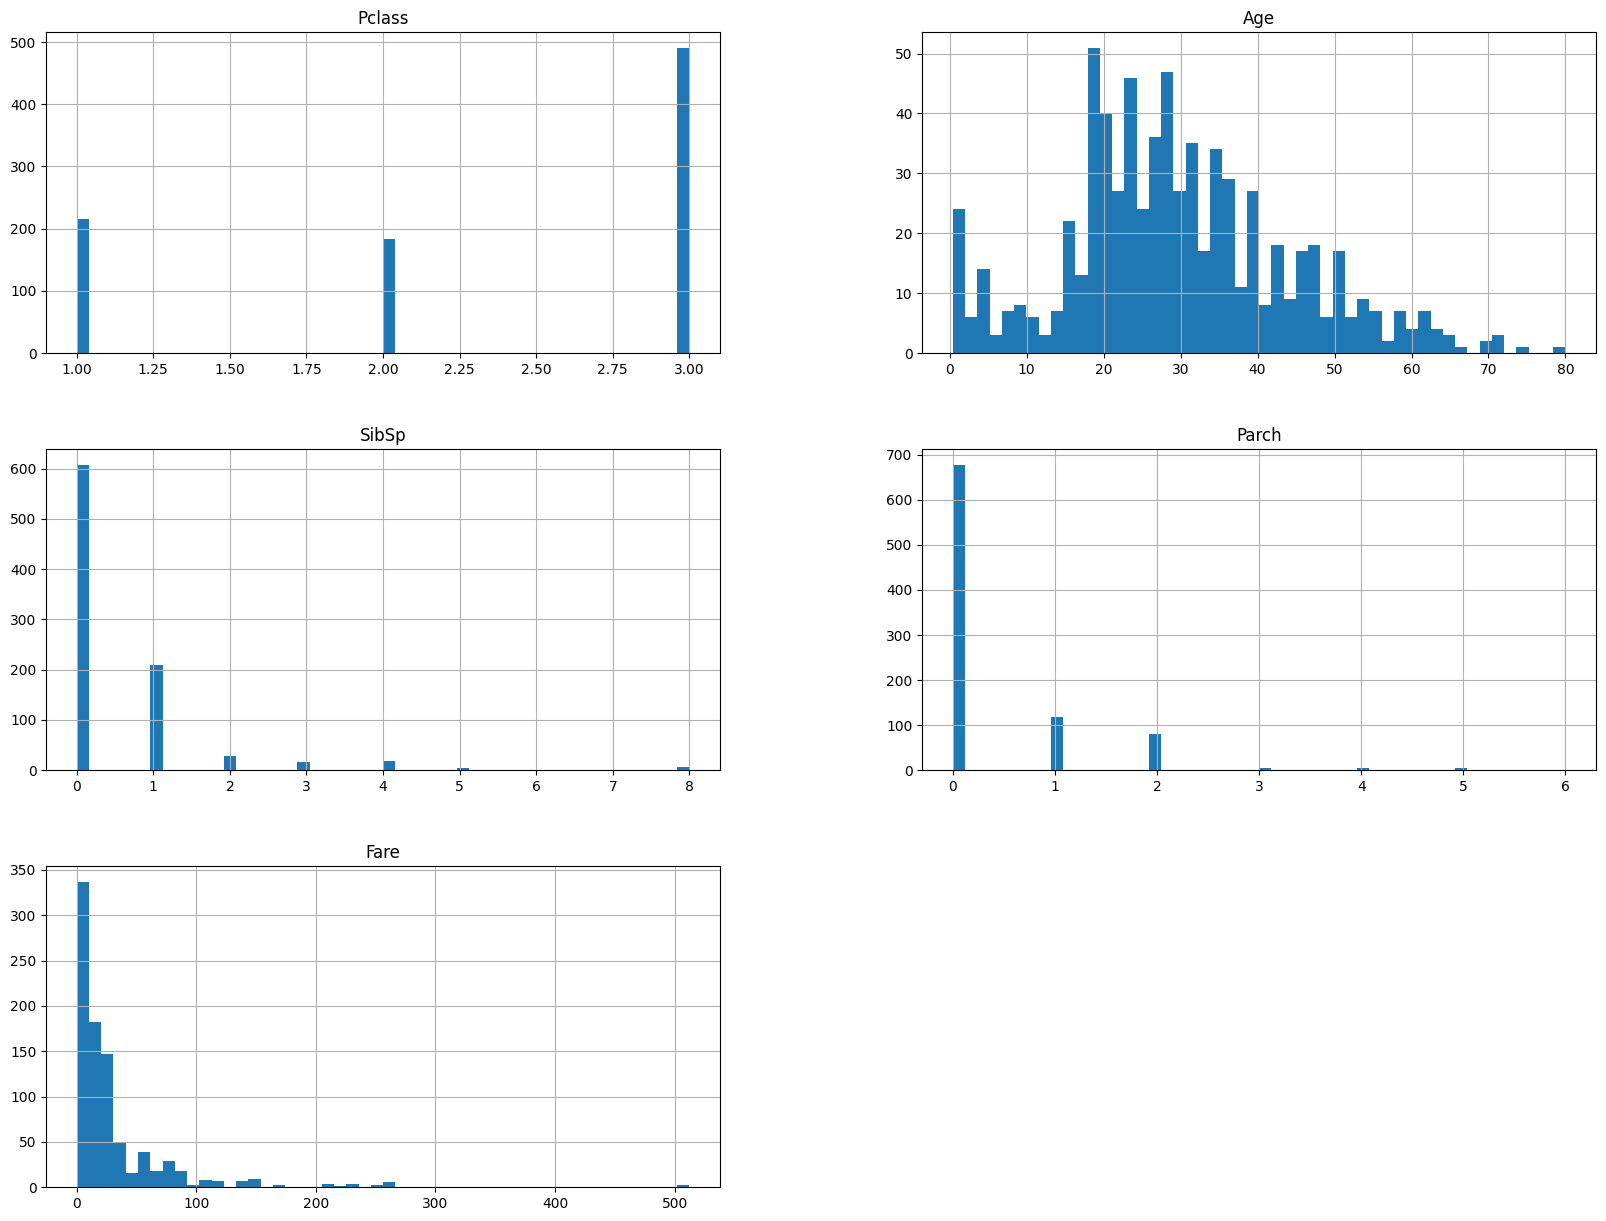

In [ ]:
import matplotlib.pyplot as plt

X_train.hist(bins=50, figsize=(20,15))
plt.show()

Convertimos la variable PClass a categórica:

In [ ]:
from pandas.api.types import CategoricalDtype

cat_dtype = CategoricalDtype(categories=[3,2,1], ordered=True)

X_train["Pclass"]=X_train["Pclass"].astype(cat_dtype)


In [ ]:
test_data["Pclass"] = test_data["Pclass"].astype(cat_dtype) #convertimos la Pclass del test set.

In [ ]:
X_train.dtypes

Pclass      category
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin         object
Embarked      object
dtype: object

In [ ]:
# el 77% de entradas de Cabin son valores faltantes. Así que la eliminaremos

X_train = X_train.drop("Cabin", axis=1)
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
#lo mismo para el test set
test_data =  test_data.drop("Cabin", axis=1)
test_data.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


Transformadores:


In [ ]:
# frecuencias de cada ticket
Num_passengers_per_ticket = X_train[["Ticket"]].value_counts().to_frame()
Num_passengers_per_ticket.head()

,0
Ticket,
1601,7
CA. 2343,7
347082,7
CA 2144,6
347088,6


Esto nos dice que hay tickets que incluyen más de 1 pasajero.

In [ ]:
#hacemos un left join
X_train = X_train.merge(Num_passengers_per_ticket, on='Ticket', how='left')   # unimos el numero de pasajeros por ticker con la tabla original

In [ ]:
X_train = X_train.reset_index(drop=False)
X_train["index"] = X_train["index"]+1
X_train.set_index("index", inplace=True)

X_train.index.name="PassengerId"
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,0
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [ ]:
#Renombramos columna

X_train.rename(columns={0:'Num_passen_per_ticket'}, inplace=True)
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Num_passen_per_ticket
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [ ]:
# Agregamos nueva columna con valor del ticket por persona

X_train["Fare_per_passen"] = X_train["Fare"]/X_train["Num_passen_per_ticket"]
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Num_passen_per_ticket,Fare_per_passen
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,7.2500
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,71.2833
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,7.9250
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,26.5500
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,8.0500


<Axes: >

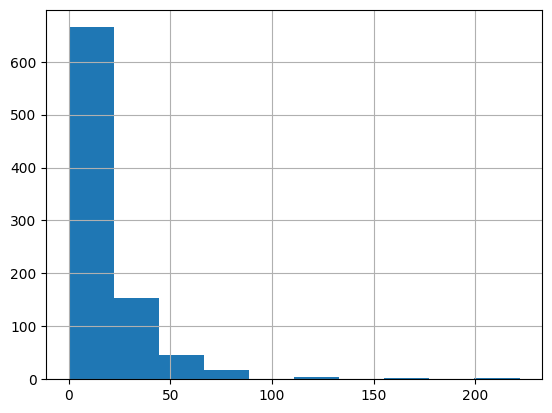

In [ ]:
X_train["Fare_per_passen"].hist()

In [ ]:
X_y_train = pd.concat([X_train,y_train], axis=1)
X_y_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Num_passen_per_ticket', 'Fare_per_passen', 'Survived'],
      dtype='object')

In [ ]:
X_y_train.isnull().sum()

Pclass                     0
Name                       0
Sex                        0
Age                      177
SibSp                      0
Parch                      0
Ticket                     0
Fare                       0
Embarked                   2
Num_passen_per_ticket      0
Fare_per_passen            0
Survived                   0
dtype: int64

<Axes: xlabel='Survived', ylabel='Fare_per_passen'>

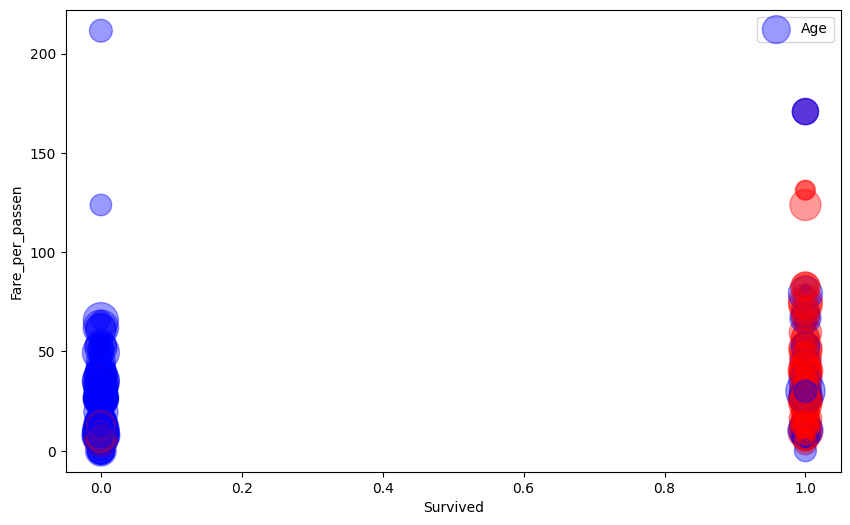

In [ ]:
colors = {"male": "blue", "female": "red"}
X_y_train.plot(kind = "scatter", x="Survived", y="Fare_per_passen", s=X_y_train["Age"]*10 ,label="Age", c=[colors[sex] for sex in X_y_train["Sex"]],alpha=0.4,figsize=(10,6))


Vemos que la mayoria de las personas que sobrevivieron, fueron mujeres. El "Sex" parece ser una variable importante.

<Axes: xlabel='Survived', ylabel='Age'>

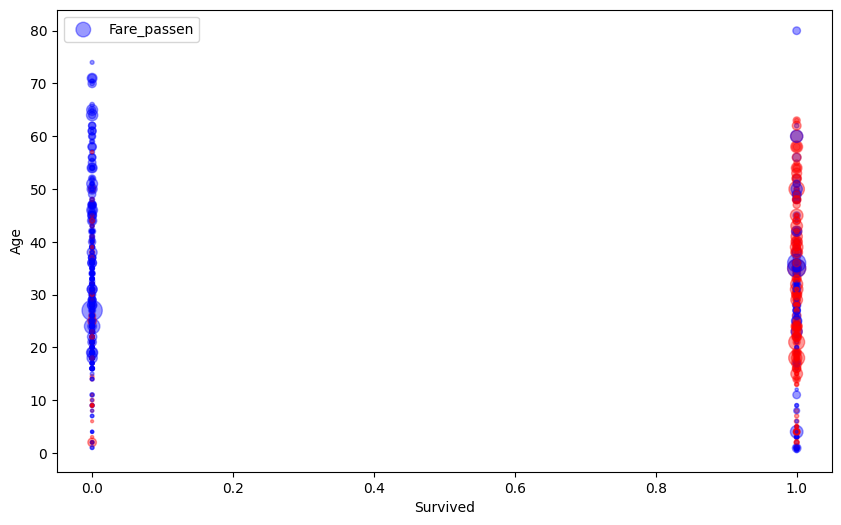

In [ ]:
colors = {"male": "blue", "female": "red"}
X_y_train.plot(kind = "scatter", x="Survived", y="Age", s="Fare_per_passen" ,label="Fare_passen", c=[colors[sex] for sex in X_y_train["Sex"]],alpha=0.4,figsize=(10,6))


In [ ]:
%%capture
!pip install seaborn

<Axes: xlabel='Pclass', ylabel='count'>

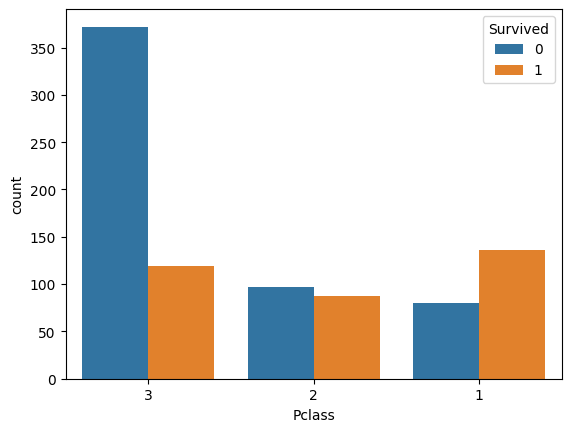

In [ ]:
import seaborn as sns
sns.countplot(data=X_y_train, x=X_y_train["Pclass"], hue=X_y_train["Survived"])

Segun la grafica, esta nos indica que la mayoria de los pasajeros de tercera clase murieron. Mientras que la mayoria de primera clase sobrevivieron.

In [ ]:
df=X_y_train[["Pclass","Survived"]]
for i in [1,2,3]:
  clase_k = df[df["Pclass"]==i]
  print(clase_k.value_counts()/len(clase_k))

Pclass  Survived
1       1           0.62963
        0           0.37037
dtype: float64
Pclass  Survived
2       0           0.527174
        1           0.472826
dtype: float64
Pclass  Survived
3       0           0.757637
        1           0.242363
dtype: float64


* El 62% de primera clase sobrevivieron.
* El 52% de segunda clase sorebvivieron.
* El 24% de tercera clase sobrevivieron.

In [ ]:
#separamos variables numéricas y categóricas
X_train_num = X_train.select_dtypes(include = ["int64", "float64"])
X_train_num.head()

,Age,SibSp,Parch,Fare,Num_passen_per_ticket,Fare_per_passen
PassengerId,,,,,,
1,22.0,1,0,7.2500,1,7.2500
2,38.0,1,0,71.2833,1,71.2833
3,26.0,0,0,7.9250,1,7.9250
4,35.0,1,0,53.1000,2,26.5500
5,35.0,0,0,8.0500,1,8.0500


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Pclass                 891 non-null    category
 1   Name                   891 non-null    object  
 2   Sex                    891 non-null    object  
 3   Age                    714 non-null    float64 
 4   SibSp                  891 non-null    int64   
 5   Parch                  891 non-null    int64   
 6   Ticket                 891 non-null    object  
 7   Fare                   891 non-null    float64 
 8   Embarked               889 non-null    object  
 9   Num_passen_per_ticket  891 non-null    int64   
 10  Fare_per_passen        891 non-null    float64 
dtypes: category(1), float64(3), int64(3), object(4)
memory usage: 77.6+ KB


Llenamos los valores faltantes en Embarked:

In [ ]:
X_Embarked = X_train[["Embarked"]]
X_Embarked.head()

,Embarked
PassengerId,
1,S
2,C
3,S
4,S
5,S


In [ ]:
from sklearn.impute import SimpleImputer

cat_imputer = SimpleImputer(strategy="most_frequent")

X_Embarked_imputed = cat_imputer.fit_transform(X_Embarked)



In [ ]:
X_Embarked_df = pd.DataFrame(X_Embarked_imputed, columns=["Embarked_Imputed"])


In [ ]:
#para que el indice empiece desde 1
X_Embarked_df = X_Embarked_df.reset_index(drop=False)
X_Embarked_df["index"] = X_Embarked_df["index"]+1
X_Embarked_df.set_index("index", inplace=True)
X_Embarked_df.head()


,Embarked_Imputed
index,
1,S
2,C
3,S
4,S
5,S


In [ ]:
X_train = pd.concat([X_train,X_Embarked_df], axis=1)
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Num_passen_per_ticket,Fare_per_passen,Embarked_Imputed
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,26.5500,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,8.0500,S


In [ ]:
X_train.index.names=["PassengerId"]  #le asigna el nombre passengerID al index

In [ ]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Num_passen_per_ticket,Fare_per_passen,Embarked_Imputed
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,26.5500,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,8.0500,S


Hacemos ahora el resto de transformaciones usando pipelines:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder   #para nominales
from sklearn.preprocessing import OrdinalEncoder  #para ordinales
from sklearn.impute import SimpleImputer   #para missing values
from sklearn.compose import ColumnTransformer

# Pipeline for numeric variables
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

#Missing values para Embarked

# List of nominal variables
cat_nominales = ["Sex","Embarked_Imputed"]

# List of ordinal variables
cat_ordinales = ["Pclass"]

# List of numeric variables
num_variables = list(X_train_num)

# Define the full pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_variables),
    ("encoder_nominal", OneHotEncoder(), cat_nominales),
    ("encoder_ordinal", OrdinalEncoder(), cat_ordinales)
])


In [ ]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [ ]:
X_train_prepared.shape

(891, 12)

ya tenemos los datos preparados para los modelos a entrenar.

Procedemos a entrenar y seleccionar el modelo:

1. Opcion 1: Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

forest_clf.fit(X_train_prepared,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score

In [ ]:
def evaluate(model):
  y_train_pred_model = cross_val_predict(model,X_train_prepared,y_train,cv=5)
  accuracy_cross_val = cross_val_score(model,X_train_prepared,y_train,cv=5,scoring="accuracy")
  precision = precision_score(y_train, y_train_pred_model)
  recall = recall_score(y_train, y_train_pred_model)
  conf_mat = confusion_matrix(y_train,y_train_pred_model)
  print(conf_mat,"\n")
  print(round(accuracy_cross_val.max()*100,2)," > Accuracy >",round(accuracy_cross_val.min()*100,2),"% \n")
  print("Precision = ", round(precision*100,2),"% \n")
  print("Recall = ", round(recall*100,2),"% ")

In [ ]:
#Hacemos una prediccion para evaluar con matriz de confusion
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(forest_clf, X_train_prepared, y_train, cv=5)

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[469,  80],
       [ 92, 250]])

In [ ]:
evaluate(forest_clf)

[[471  78]
 [ 90 252]] 

Accuracy > 76.4 % 

Precision =  76.36 % 

Recall =  73.68 % 


2. Opcion 2: KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train_prepared,y_train)

KNeighborsClassifier()

In [ ]:
evaluate(knn_clf)

[[473  76]
 [ 95 247]] 

Accuracy > 76.97 % 

Precision =  76.47 % 

Recall =  72.22 % 


3. Opcion 3: Regresion logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_clf = LogisticRegression()

log_reg_clf.fit(X_train_prepared,y_train)

LogisticRegression()

In [ ]:
evaluate(log_reg_clf)

[[466  83]
 [105 237]] 

Accuracy > 76.97 % 

Precision =  74.06 % 

Recall =  69.3 % 


4. opcion 4: ADA boosting

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=1), n_estimators=200,
 algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train_prepared, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [ ]:
evaluate(ada_clf)

[[463  86]
 [ 85 257]] 

Accuracy > 75.98 % 

Precision =  74.93 % 

Recall =  75.15 % 


5. XGBClassifier:

In [ ]:
import xgboost as xgb

xgb_clf=xgb.XGBClassifier()

xgb_clf.fit(X_train_prepared,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

evaluate(xgb_clf)

[[479  70]
 [ 94 248]] 

85.39  > Accuracy > 78.65 % 

Precision =  77.99 % 

Recall =  72.51 % 


5. Support VM

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()

svm_clf.fit(X_train_prepared,y_train)

SVC()

In [ ]:
evaluate(svm_clf)

[[485  64]
 [ 91 251]] 

Accuracy > 80.9 % 

Precision =  79.68 % 

Recall =  73.39 % 


-------------------------------------------------------------

6. Voting Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

svm_clf_prob = SVC(probability=True)

voting_clf = VotingClassifier(
  estimators=[ ('knn', knn_final),('fr', final_forest_clf), ('svm', final_svm)],
  voting='soft')

voting_clf.fit(X_train_prepared, y_train)



VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='brute',
                                                   leaf_size=20, n_jobs=-1,
                                                   n_neighbors=12)),
                             ('fr',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=30,
                                                     max_leaf_nodes=60,
                                                     n_estimators=10,
                                                     n_jobs=-1)),
                             ('svm', SVC(C=1, probability=True))],
                 voting='soft')

In [ ]:
evaluate(voting_clf)

[[488  61]
 [ 99 243]] 

85.39  > Accuracy > 80.9 % 

Precision =  79.93 % 

Recall =  71.05 % 


7. Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train_prepared, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [ ]:
evaluate(bag_clf)

[[498  51]
 [113 229]] 

Accuracy > 77.65 % 

Precision =  81.79 % 

Recall =  66.96 % 


Los modelos más prometedores son : XGBoost, Support VM, KNN y random forest. También el voting clasifier parece funcionar bastante bien.

FINE-TUNING:

1. **Random Forest**

In [ ]:
y_probas_forest = cross_val_predict(forest_clf, X_train_prepared, y_train, cv=5, method="predict_proba") # obtenemos las probabilidades de pertenecer a cada clase

In [ ]:
y_scores_forest = y_probas_forest[:, 1]  # usamos las probabilidades de ser sobreviviente como scores

In [ ]:


from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_forest)  # devuelve (array de precisions , array de recalls, array the thresholds)
                                                                                # la i-esima precision/recall corresponde  a la predicción cuando score >= i-esimo threshold


In [ ]:
# graficamos precision y recalls como funciones de los thresholds

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.figure(figsize=(12,8))
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")   # precisions[:-1] sin incluir el ultimo
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.legend(["Precision","Recall"],fontsize="x-large",loc=7)   # ubicacion código 7 --> "center right"
  plt.axhline(y=0.7)
  plt.xlabel("Threshold", fontsize=18)
  plt.grid()

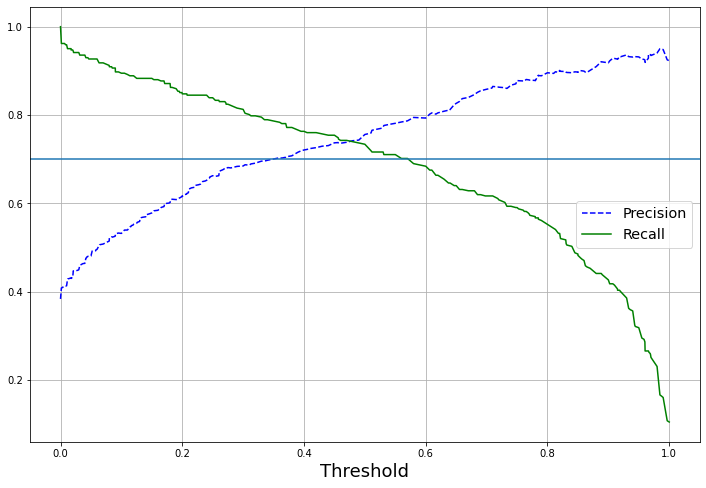

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
from scipy.stats import loguniform


class loguniform_int:
    """Integer valued version of the log-uniform distribution"""
    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3,5,7,10,20,30,50,100] ,
               'criterion' : ["gini", "entropy"],
               'n_jobs' : [-1],
               'max_leaf_nodes' : [30,40,50,60,70,80,90],
               'max_depth' : [20, 30, 40, 50, 60]},
              {'n_estimators': [3,5,7,10,20,30,50,100] ,
               'criterion' : ["gini", "entropy"],
               'n_jobs' : [-1],
               'max_leaf_nodes' : [30,40,50,60,70,80,90],
               'max_depth' : [20, 30, 40, 50, 60],
               'bootstrap' : [False]}]

grid_search = GridSearchCV(forest_clf,                           #  estimador del modelo
                           param_grid,                           #  param_grid : lista de diccionarios con las combinaciones deseadas
                           cv=5,                                 #  N° de folds para cross validation
                           scoring='accuracy',                   #  scoring (debe ser funcion de utilidad)
                           return_train_score=True)

In [ ]:
grid_search.fit(X_train_prepared,y_train)

In [ ]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_leaf_nodes': 60,
 'n_estimators': 10,
 'n_jobs': -1}

In [ ]:
grid_search.best_score_

0.8395204318624065

In [ ]:
final_forest_clf = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=30, max_leaf_nodes=60,n_jobs=-1)

In [ ]:
evaluate(final_forest_clf)

[[497  52]
 [107 235]] 

86.52  > Accuracy > 79.21 % 

Precision =  81.88 % 

Recall =  68.71 % 


In [ ]:
grid_search.best_estimator_.feature_importances_  #Falta asociarle los nombres de las variables

array([0.15574241, 0.03737523, 0.02607399, 0.12739723, 0.05307467,
       0.11559694, 0.10670077, 0.24137166, 0.01218145, 0.00741808,
       0.01372939, 0.10333817])

In [ ]:
y_probas_final_forest = cross_val_predict(final_forest_clf, X_train_prepared, y_train, cv=5, method="predict_proba") # obtenemos las probabilidades de per

In [ ]:
y_scores_final_forest = y_probas_final_forest[:, 1]  # usamos las probabilidades de ser sobreviviente como scores

2. **knn**

In [ ]:
y_probas_knn = cross_val_predict(knn_clf, X_train_prepared, y_train, cv=5, method="predict_proba") # obtenemos las probabilidades de pertenecer a cada clase

In [ ]:
y_scores_knn = y_probas_knn[:, 1]  # probabilidades de pertenecer a la clase positiva

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_knn)  # devuelve (array de precisions , array de recalls, array the thresholds)
                                                                                # la i-esima precision/recall corresponde  a la predicción cuando score >= i-esimo threshold

In [ ]:
# graficamos precision y recalls como funciones de los thresholds

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.figure(figsize=(12,8))
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")   # precisions[:-1] sin incluir el ultimo
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.legend(["Precision","Recall"],fontsize="x-large",loc=7)   # ubicacion código 7 --> "center right"
  plt.axhline(y=0.7)
  plt.xlabel("Threshold", fontsize=18)
  plt.grid()

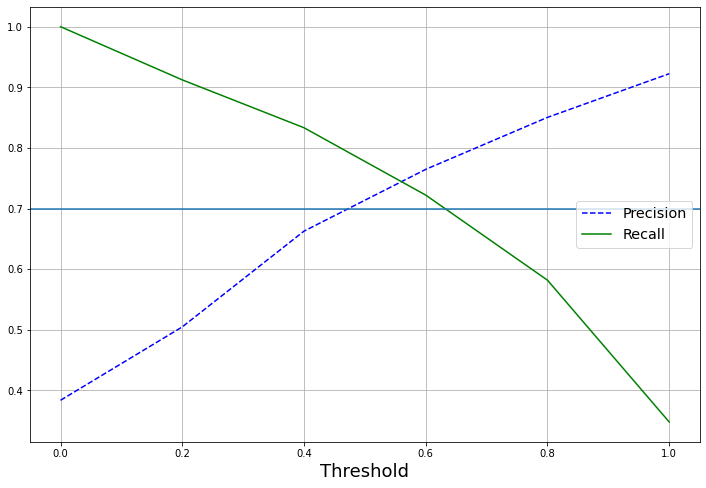

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
param_grid_knn = [{'n_neighbors': [2,3,5,7,10,12,15,20] ,
               'weights' : ["uniform", "distance"],
               'algorithm' : ['auto','ball_tree','kd_tree','brute'],
               'leaf_size' : [20, 30, 40],
               'n_jobs' : [-1] }
              ]

grid_search_knn = GridSearchCV(knn_clf,                           #  estimador del modelo
                           param_grid_knn,                           #  param_grid : lista de diccionarios con las combinaciones deseadas
                           cv=5,                                 #  N° de folds para cross validation
                           scoring='accuracy',                   #  scoring (debe ser funcion de utilidad)
                           return_train_score=True)

In [ ]:
grid_search_knn.fit(X_train_prepared,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'leaf_size': [20, 30, 40], 'n_jobs': [-1],
                          'n_neighbors': [2, 3, 5, 7, 10, 12, 15, 20],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search_knn.best_estimator_

KNeighborsClassifier(algorithm='brute', leaf_size=20, n_jobs=-1, n_neighbors=12)

In [ ]:
grid_search_knn.best_score_

0.810344611135522

In [ ]:
evaluate(grid_search_knn.best_estimator_)

[[487  62]
 [107 235]] 

Accuracy > 76.97 % 

Precision =  79.12 % 

Recall =  68.71 % 


In [ ]:
knn_final = KNeighborsClassifier(algorithm='brute', leaf_size=20, n_jobs=-1, n_neighbors=12)

In [ ]:
y_probas_knn_final = cross_val_predict(knn_final, X_train_prepared, y_train, cv=5, method="predict_proba") # obtenemos las probabilidades de pertenecer a cada clase

In [ ]:
y_scores_knn_final = y_probas_knn_final[:, 1]

Knn vs Randomforest

In [ ]:
# calculamos primero FPR y TPR para distintos thresholds (similar a precisions vs recall)
#para Randomforest final
from sklearn.metrics import roc_curve

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_final_forest)   # devuelve (array de FPR , array de TPR(recalls), array the thresholds)
                                                                                  # el i-esimo FPR/TPR corresponde al i-esimo threshold

In [ ]:
# calculamos primero FPR y TPR para distintos thresholds (similar a precisions vs recall)
#para knn

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, y_scores_knn_final)   # devuelve (array de FPR , array de TPR(recalls), array the thresholds)
                                                                                  # el i-esimo FPR/TPR corresponde al i-esimo threshold

In [ ]:
def plot_roc_vs_roc(fpr_1,tpr_1,fpr_2,tpr_2,label_1,label_2):
  plt.figure(figsize=(12,8))
  plt.plot(fpr_1, tpr_1, linewidth=3, label=label_1)
  plt.plot(fpr_2, tpr_2,"g", linewidth=4, label=label_2)
  plt.plot([0, 1], [0, 1], 'k--')   #diagonal puntueada
  plt.grid()                     #cuadricula
  plt.xlabel("False Positive Rate", fontsize=18)
  plt.ylabel("True Positive Rate(Recall)", fontsize=18)
  plt.xlim((0,1))
  plt.ylim((0,1))
  plt.legend(loc="lower right",fontsize=14)

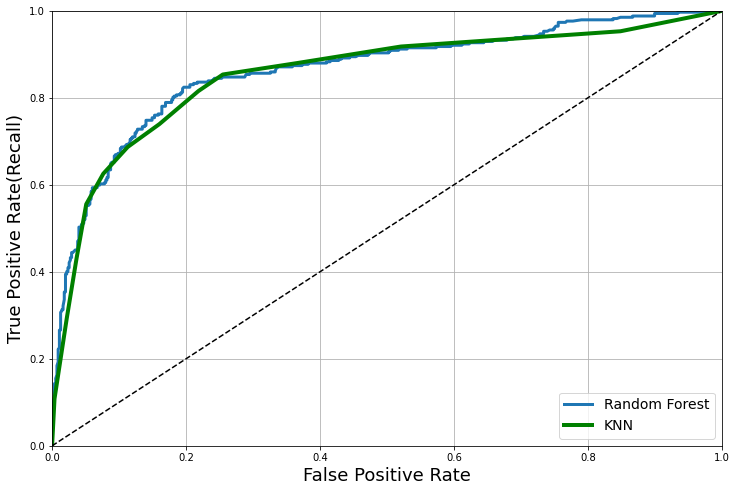

In [ ]:
plot_roc_vs_roc(fpr_forest, tpr_forest,fpr_knn,tpr_knn,'Random Forest','KNN')
plt.show()

In [ ]:
#area bajo la curva
from sklearn.metrics import roc_auc_score

print("AUC Random Forest : ", roc_auc_score(y_train, y_scores_final_forest) )  # calcula el area bajo la curva del ROC

AUC Random Forest :  0.8630737438617796


In [ ]:
print("AUC KNN : ", roc_auc_score(y_train, y_scores_knn_final) )  # calcula el area bajo la curva del ROC

AUC KNN :  0.8547598504457866


3. **SVM**

In [ ]:
param_grid_svm = [{'C' : [0.1, 1, 10, 100, 1000],
                   'kernel': ['linear','poly','rbf','sigmoid'],
                   'gamma' : ["scale", "auto"], },
                  {'C' : [0.1, 1, 10, 100, 1000],
                   'kernel': ['poly'] ,
                   'gamma' : ["scale", "auto"],
                   'degree': [2,3,4,5,6]}
                  ]

grid_search_svm = GridSearchCV(svm_clf,                           #  estimador del modelo
                           param_grid_svm,                           #  param_grid : lista de diccionarios con las combinaciones deseadas
                           cv=5,                                 #  N° de folds para cross validation
                           scoring='accuracy',                   #  scoring (debe ser funcion de utilidad)
                           return_train_score=True)

In [ ]:
grid_search_svm.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'degree': [2, 3, 4, 5, 6], 'gamma': ['scale', 'auto'],
                          'kernel': ['poly']}],
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search_svm.best_estimator_

SVC(C=1)

In [ ]:
final_svm = SVC(C=1, probability=True)

In [ ]:
grid_search_svm.best_score_

0.8260247316552632

In [ ]:
evaluate(final_svm)

[[485  64]
 [ 91 251]] 

84.83  > Accuracy > 80.9 % 

Precision =  79.68 % 

Recall =  73.39 % 


In [ ]:
final_svm = grid_search_svm.best_estimator_

4. XGBoost

In [ ]:
param_grid_xgb = [{'booster' : ['gbtree','dart'],
                   'max_depth': [4, 6, 8, 10],
                   'eta' : [0.1, 0.3],
                   'gamma': [0, 2],
                   'n_estimators' : [30, 50, 100],
                   'objective' : ['binary:logistic']},
                  {'booster' : ['gblinear'],
                   'alpha': [0, 2],
                   'objective' : ['binary:logistic']}
                  ]

grid_search_xbg = GridSearchCV(xgb_clf,                           #  estimador del modelo
                           param_grid_xgb,                           #  param_grid : lista de diccionarios con las combinaciones deseadas
                           cv=5,                                 #  N° de folds para cross validation
                           scoring='accuracy',                   #  scoring (debe ser funcion de utilidad)
                           return_train_score=True)

In [ ]:
grid_search_xbg.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid=[{'booster': ['gbtree', 'dart'], 'eta': [0.1, 0.3],
                          'gamma': [0, 2], 'max_depth': [4, 6, 8, 10],
                          'n_estimators': [30, 50, 100],
                          'objective': ['binary:logistic']},
                         {'alpha': [0, 2], 'booster': ['gblinear'],
                          'objective': ['binary:logistic']}],
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search_xbg.best_estimator_

XGBClassifier(eta=0.1, gamma=2, max_depth=8, n_estimators=50)

In [ ]:
grid_search_xbg.best_score_

0.8305567760969181

In [ ]:
final_xgb_clf = xgb.XGBClassifier(eta=0.1, gamma=2, max_depth=8, n_estimators=50)

In [ ]:
final_xgb_clf.fit(X_train_prepared,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=2, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [ ]:
evaluate(final_xgb_clf)

[[498  51]
 [100 242]] 

87.64  > Accuracy > 80.45 % 

Precision =  82.59 % 

Recall =  70.76 % 


El mejor modelo es XGBoost. Así que lo usaremos para hacer las predicciones sobre el conjunto de testeo.

## **Predicciones en el test set:**

In [ ]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    object  
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    int64   
 5   Parch     418 non-null    int64   
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Embarked  418 non-null    object  
dtypes: category(1), float64(2), int64(2), object(4)
memory usage: 29.9+ KB


In [ ]:
# frecuencias de cada ticket
Num_passengers_per_ticket_test = test_data[["Ticket"]].value_counts().to_frame()
Num_passengers_per_ticket_test.head()

,0
Ticket,
PC 17608,5
113503,4
CA. 2343,4
347077,3
PC 17483,3


In [ ]:
#hacemos un left join
test_data = test_data.merge(Num_passengers_per_ticket_test, on='Ticket', how='left')   # unimos el numero de pasajeros por ticker con la tabla original


In [ ]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,0
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


In [ ]:
test_data = test_data.reset_index(drop=False)
test_data["index"] = test_data["index"]+892
test_data.set_index("index", inplace=True)

test_data.index.name="PassengerId"
test_data.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,0
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


In [ ]:
test_data.rename(columns={0:'Num_passen_per_ticket'}, inplace=True)
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Num_passen_per_ticket
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


In [ ]:
test_data["Fare_per_passen"] = test_data["Fare"]/test_data["Num_passen_per_ticket"]
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Num_passen_per_ticket,Fare_per_passen
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,7.8292
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,7.0000
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,9.6875
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,8.6625
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,12.2875


In [ ]:
X_Embarked = test_data[["Embarked"]]
X_Embarked_imputed = cat_imputer.transform(X_Embarked)



X_Embarked_df = pd.DataFrame(X_Embarked_imputed, columns=["Embarked_Imputed"])


#para que el indice empiece desde 892
X_Embarked_df = X_Embarked_df.reset_index(drop=False)
X_Embarked_df["index"] = X_Embarked_df["index"]+892
X_Embarked_df.set_index("index", inplace=True)


test_data = test_data.drop("Embarked", axis=1)



test_data = pd.concat([test_data,X_Embarked_df], axis=1)


test_data.index.names=["PassengerId"]  #le asigna el nombre passengerID al index
test_data.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Num_passen_per_ticket,Fare_per_passen,Embarked_Imputed
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,1,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,1,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,1,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,1,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,1,12.2875,S


In [ ]:
import pandas as pd
test_data.isnull().sum()

Pclass                    0
Name                      0
Sex                       0
Age                      86
SibSp                     0
Parch                     0
Ticket                    0
Fare                      1
Num_passen_per_ticket     0
Fare_per_passen           1
Embarked_Imputed          0
dtype: int64

In [ ]:
test_prepared = full_pipeline.transform(test_data)

In [ ]:
final_preds=final_xgb_clf.predict(test_prepared)

In [ ]:
final_preds.shape

(418,)

In [ ]:
serie_predicciones = pd.Series(final_preds.flatten(), index=test_data.index, name='Survived')

In [ ]:
serie_predicciones

PassengerId
892     0
893     0
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [ ]:
serie_predicciones.to_csv('/content/predicciones_finales.csv',  header=True)